<h1><center>Audit de la qualité de la donnée</center></h1>

## Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from ipywidgets import interact, widgets
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
path = 'C:/Users/AymenBouhou/Desktop/QuadraticFoot/Data/Fifa/2023.csv'

chunk_size = 1000
df = pd.DataFrame()
for chunk in pd.read_csv(path, chunksize=chunk_size):
    df = pd.concat([df, chunk])

pd.set_option('display.max_columns', None)

In [20]:
df.head()

,sofifa_id,player_url,short_name,age,height,nationality,club_name,league_name,player_positions,potential,weight_kg,foot,best_overall,best_position,growth,joined,loan_date_end,value,wage,release_clause,total_attacking,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,total_skill,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,total_movement,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,total_power,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,total_mentality,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,total_defending,defending_marking,defending_standing_tackle,defending_sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,international_reputation,pace_/_diving,shooting_/_handling,passing_/_kicking,dribbling_/_reflexes,defending_/_pace,physical_/_positioning
0,231747,/player/231747/kylian-mbappe/230024/,K. Mbappé,23,"182cm / 6'0""",France,Paris Saint Germain,[France] Lig,ST,95,75kg / 165lbs,Right,92,ST,4,"Jul 1, 2018",NaN,€190.5M,€230K,€366.7M,411,78,93,72,85,83,404,93,80,69,71,91,461,97,97,93,93,81,410,88,77,87,76,82,361,64,38,92,83,84,88,92,26,34,32,42,13,5,11,6,2181,470,4,5,High,Low,4,97,89,80,92,36,76
1,192985,/player/192985/kevin-de-bruyne/230024/,K. De Bruyne,31,"181cm / 5'11""",Belgium,Manchester City,[England] Premier Le,CM,91,75kg / 165lbs,Right,91,CM,0,"Aug 30, 2015",NaN,€107.5M,€350K,€198.9M,410,94,85,55,93,83,441,86,89,83,93,90,393,75,73,76,91,78,409,92,63,89,74,91,405,75,65,88,94,83,88,185,66,66,53,56,15,13,10,13,2299,481,5,4,High,Medium,4,74,88,93,86,63,77
2,188545,/player/188545/robert-lewandowski/230024/,R. Lewandowski,33,"185cm / 6'1""",Poland,FC Barcelona,[Spain] La,ST,91,81kg / 179lbs,Right,91,ST,0,"Jul 18, 2022",NaN,€84M,€420K,€172.2M,429,71,94,91,84,89,408,85,79,85,70,89,403,76,75,77,93,82,423,91,85,76,87,84,395,81,49,94,81,90,88,96,35,42,19,51,15,6,8,10,2205,458,4,4,High,Medium,5,75,91,79,86,44,83
3,165153,/player/165153/karim-benzema/230024/,K. Benzema,34,"185cm / 6'1""",France,Real Madrid,[Spain] La,CF,91,81kg / 179lbs,Right,91,CF,0,"Jul 9, 2009",NaN,€64M,€450K,€131.2M,433,75,91,90,89,88,409,87,82,73,76,91,398,78,79,77,92,72,411,87,79,82,82,81,366,63,39,92,90,82,90,85,43,24,18,41,13,11,5,7,2143,454,4,4,Medium,Medium,4,79,88,83,87,39,78
4,158023,/player/158023/lionel-messi/230024/,L. Messi,35,"169cm / 5'7""",Argentina,Paris Saint Germain,[France] Lig,CAM,91,67kg / 148lbs,Left,92,CAM,0,"Aug 10, 2021",NaN,€54M,€195K,€99.9M,423,84,90,70,91,88,464,95,93,93,90,93,441,87,76,91,92,95,383,86,68,70,68,91,346,44,40,93,94,75,96,79,20,35,24,54,6,11,14,8,2190,452,4,4,Low,Low,5,81,89,90,94,34,64


## Exploring the data

In [21]:
print("Le nombre de colonnes de la base est: ", df.shape[1])
print("Le nombre de lignes de la base est: ", df.shape[0])

Le nombre de colonnes de la base est:  73
Le nombre de lignes de la base est:  18440


In [22]:
df=df.drop_duplicates(subset=['sofifa_id'], keep='first')

In [23]:
print("Le nombre de lignes dans la base de données après avoir supprimé les doublons est: ", df.shape[0])

Le nombre de lignes dans la base de données après avoir supprimé les doublons est:  18283


In [24]:
int_columns = df.select_dtypes(include=['int64']).columns
int_columns = int_columns.sort_values()
print(f"La base contient '{len(int_columns)}' variables \n")
print("La liste des variables continues: \n")
for i in int_columns:
    print(i)

La base contient '56' variables 

La liste des variables continues: 

age
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
base_stats
best_overall
defending_/_pace
defending_marking
defending_sliding_tackle
defending_standing_tackle
dribbling_/_reflexes
gk_diving
gk_handling
gk_positioning
gk_reflexes
growth
international_reputation
mentality_aggression
mentality_composure
mentality_interceptions
mentality_penalties
mentality_positioning
mentality_vision
movement_acceleration
movement_agility
movement_balance
movement_reactions
movement_sprint_speed
pace_/_diving
passing_/_kicking
physical_/_positioning
potential
power_jumping
power_long_shots
power_shot_power
power_stamina
power_strength
shooting_/_handling
skill_ball_control
skill_curve
skill_dribbling
skill_fk_accuracy
skill_long_passing
skill_moves
sofifa_id
total_attacking
total_defending
total_goalkeeping
total_mentality
total_movement
total_power
total_skill
total_stats


In [25]:
cat_cols = df.select_dtypes(include=['object'])


cat_cols_df = pd.DataFrame(columns=['Variable catégorielle', "Nombre des d'attributs"])


for col in cat_cols:
    num_unique_values = len(df[col].unique())
    cat_cols_df = cat_cols_df.append({'Variable catégorielle': col, "Nombre des d'attributs": num_unique_values},
                                 ignore_index=True)

print("Un tableau qui regroupe les variables catégorielles avec leurs nombres d'attributs: \n ")

cat_cols_df

Un tableau qui regroupe les variables catégorielles avec leurs nombres d'attributs: 
 


,Variable catégorielle,Nombre des d'attributs
0,player_url,18283
1,short_name,17491
2,height,49
3,nationality,158
4,club_name,673
5,league_name,49
6,player_positions,15
7,weight_kg,54
8,foot,2
9,best_position,15


## Missing values and outliers

<AxesSubplot: >

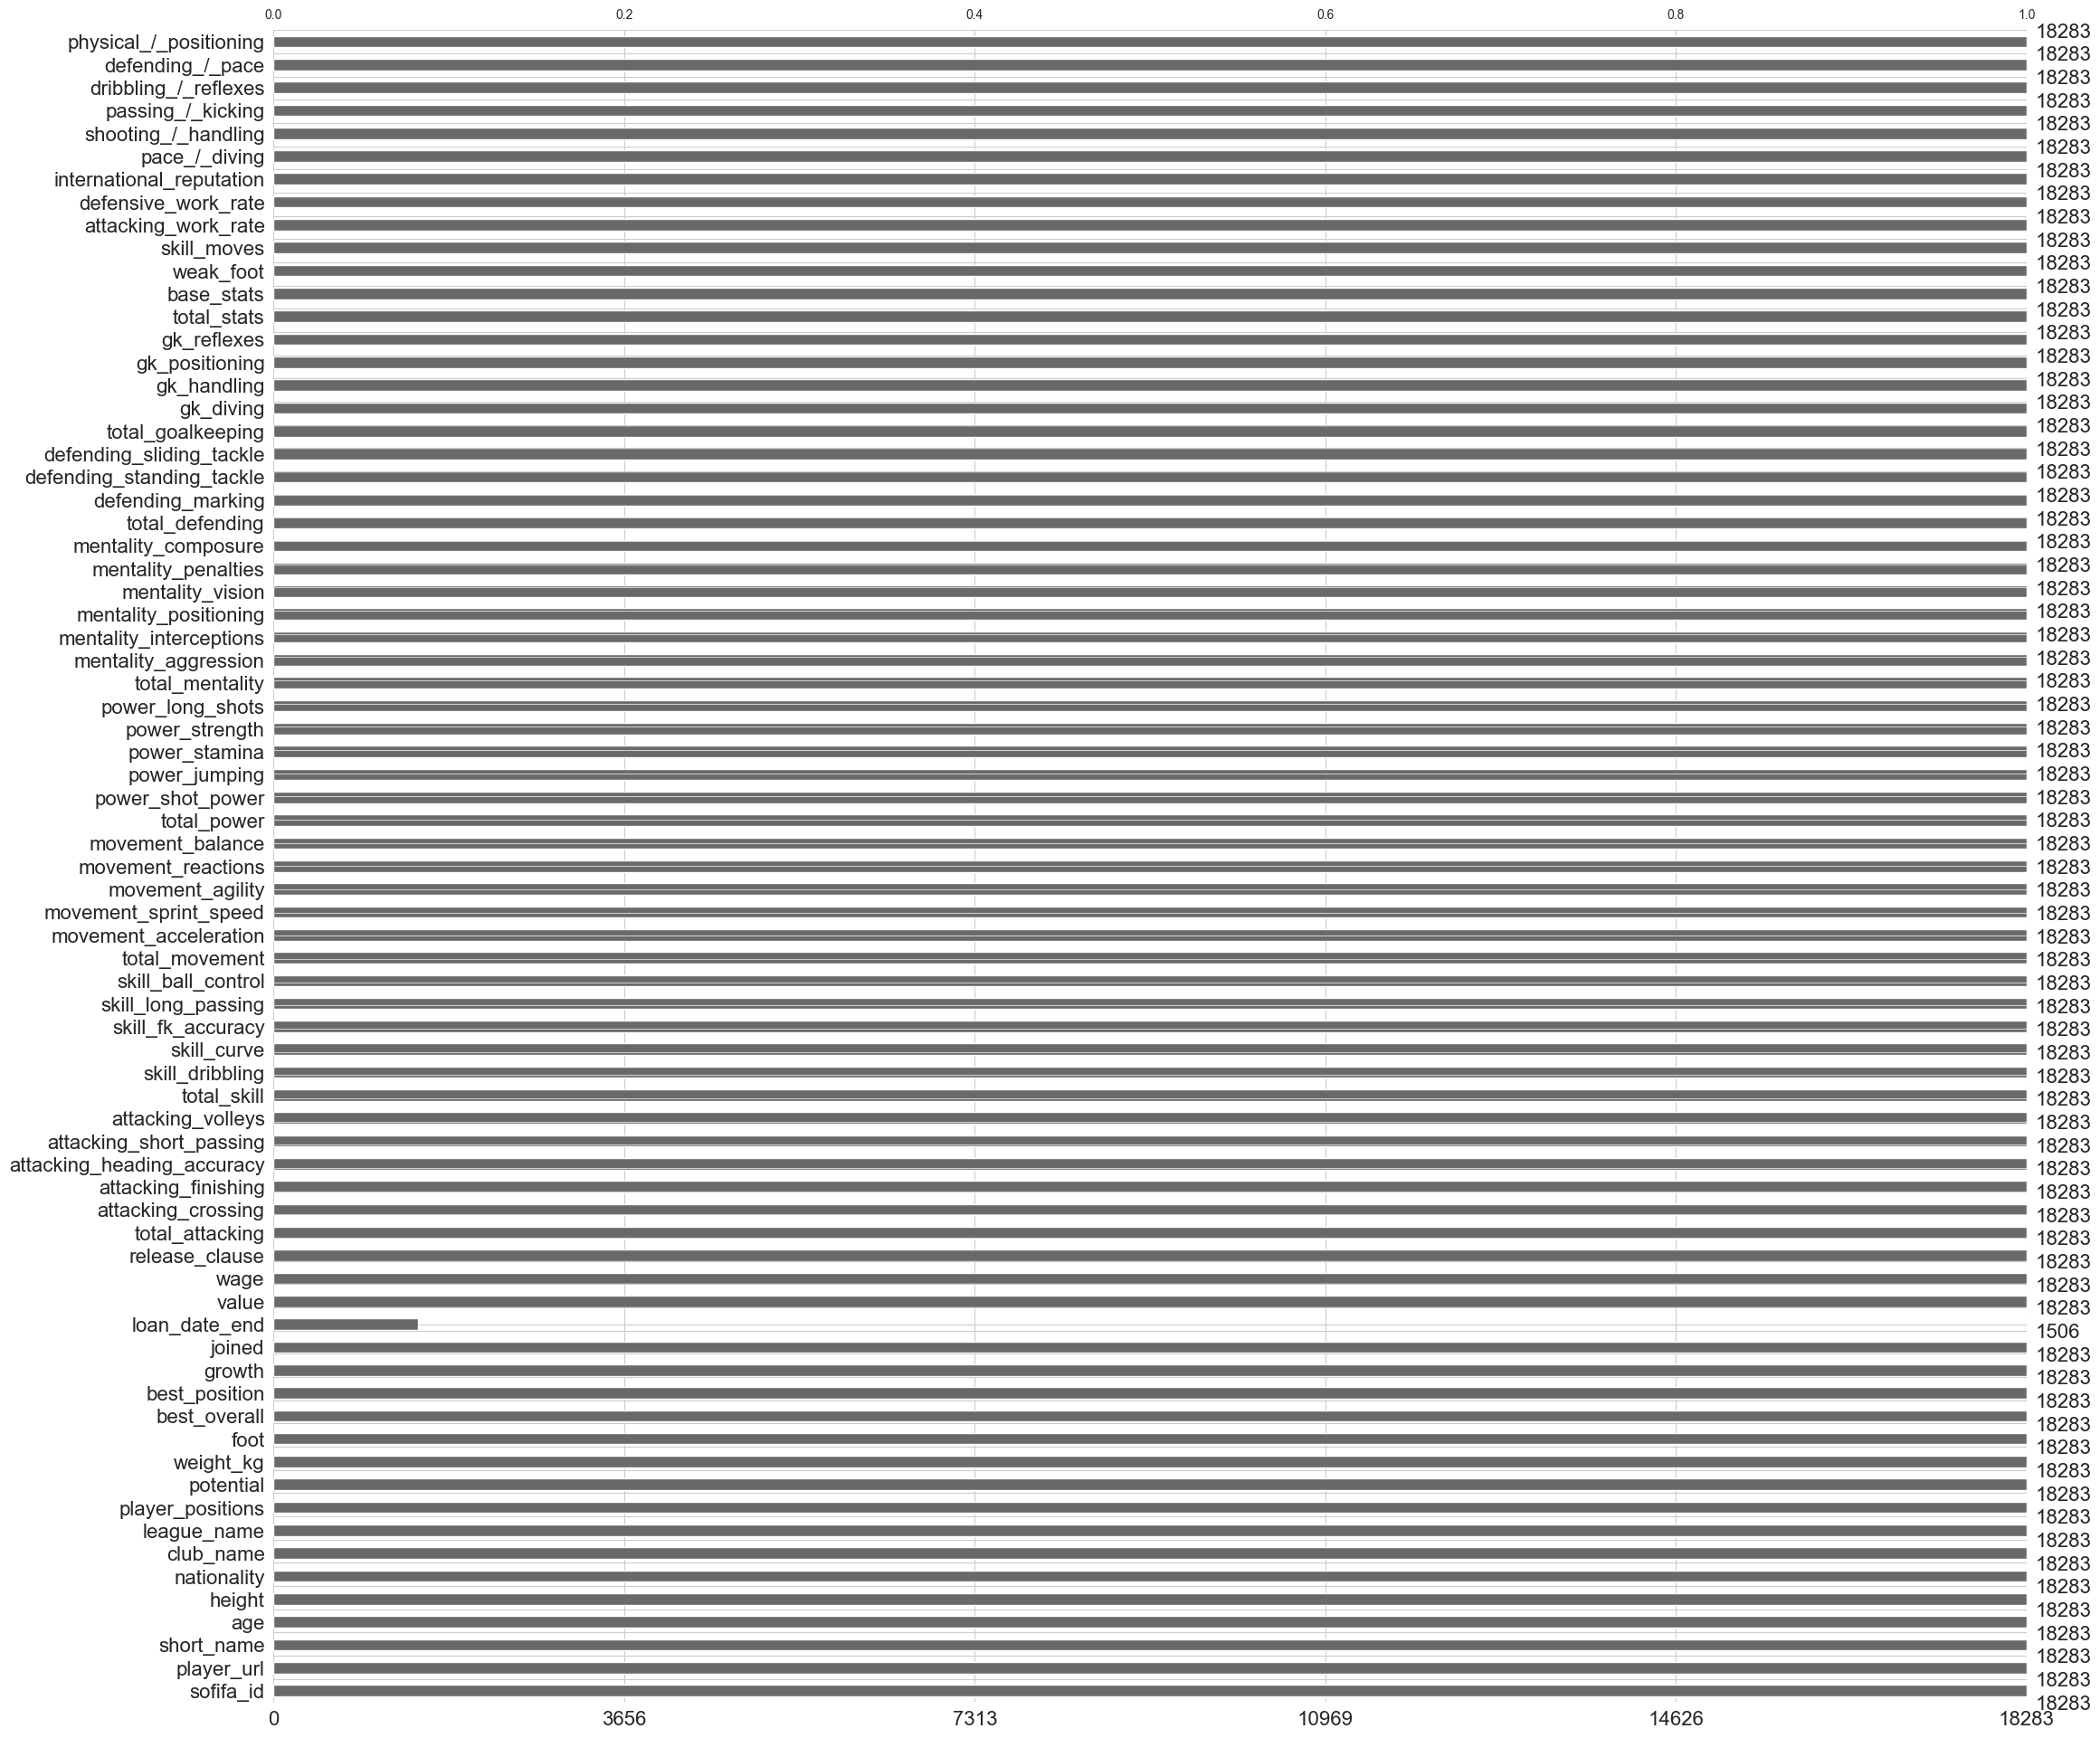

In [26]:
msno.bar(df)

In [28]:
df.describe()

,age,potential,best_overall,growth,total_attacking,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,total_skill,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,total_movement,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,total_power,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,total_mentality,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,total_defending,defending_marking,defending_standing_tackle,defending_sliding_tackle,total_goalkeeping,gk_diving,gk_handling,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,international_reputation,pace_/_diving,shooting_/_handling,passing_/_kicking,dribbling_/_reflexes,defending_/_pace,physical_/_positioning
count,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.00000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.00000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000
mean,24.943445,70.813871,66.777990,5.040201,249.232128,49.467702,46.237652,51.923098,58.992014,42.611661,258.817700,55.846962,47.859268,43.01083,53.606356,58.494284,318.583493,64.666904,64.838812,63.479079,61.590385,64.008314,297.267462,57.803916,64.683914,62.885631,65.126183,46.767817,255.476235,55.872997,46.957611,50.457857,54.230433,47.957337,58.11508,141.494722,46.701417,48.458677,46.334628,81.459881,16.400864,16.214899,16.232183,16.509435,1602.331620,357.860471,2.949516,2.385057,1.084833,68.007439,53.763441,58.001313,63.065744,50.265055,64.757480
std,4.777144,6.283713,6.662787,5.397215,74.637687,17.825166,19.643344,17.339998,14.316436,17.652827,78.239984,18.743301,17.964613,17.01356,14.620907,16.624231,57.562926,15.249282,15.023881,14.891319,8.930285,14.535451,51.523614,12.953828,12.193523,16.186032,12.581149,19.361453,65.526971,16.814306,20.618266,19.713446,13.495680,15.767744,12.08964,61.178289,20.367718,21.090407,20.627473,85.295953,17.605337,16.957366,17.114088,17.915690,274.222067,39.705776,0.681800,0.775373,0.354185,10.503809,13.644898,9.746177,9.367215,16.357612,9.527644
min,16.000000,48.000000,46.000000,0.000000,43.000000,5.000000,3.000000,5.000000,10.000000,3.000000,43.000000,4.000000,5.000000,5.00000,9.000000,5.000000,115.000000,12.000000,15.000000,17.000000,30.000000,19.000000,135.000000,18.000000,23.000000,11.000000,25.000000,4.000000,56.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.00000,22.000000,3.000000,6.000000,6.000000,12.000000,2.000000,2.000000,2.000000,2.000000,745.000000,237.000000,1.000000,1.000000,1.000000,28.000000,18.000000,25.000000,28.000000,14.000000,30.000000
25%,21.000000,66.000000,63.000000,0.000000,224.000000,39.000000,31.000000,44.000000,54.000000,30.000000,227.000000,50.000000,36.000000,32.00000,45.000000,55.000000,291.000000,57.000000,58.000000,55.000000,56.000000,56.000000,267.000000,48.000000,57.000000,55.000000,57.000000,33.000000,231.000000,45.000000,26.000000,40.000000,45.000000,38.000000,51.00000,84.000000,29.000000,29.000000,26.000000,47.000000,8.000000,8.000000,8.000000,8.000000,1470.000000,331.000000,3.000000,2.000000,1.000000,62.000000,44.000000,52.000000,58.000000,36.000000,59.000000
50%,24.000000,71.000000,67.000000,3.000000,264.000000,54.000000,50.000000,55.000000,62.000000,44.000000,274.000000,61.000000,50.000000,42.00000,56.000000,63.000000,32

In [ ]:
variable_dropdown = widgets.Dropdown(
    options=int_columns,
    value=int_columns[0],
    description='Variable:'
)
sns.set_style("whitegrid")
def generate_boxplot(variable):
    fig, ax = plt.subplots(1, figsize=(20, 10))
    sns.boxplot(x=df[variable])
    plt.title('Boxplot of {}'.format(variable))
    plt.xlabel('{}'.format(variable))
    plt.show()

widgets.interact(generate_boxplot, variable=variable_dropdown)

In [9]:
path = 'C:/Users/AymenBouhou/Desktop/QuadraticFoot/Data/Fbref/2016-2017.csv'

In [10]:
chunk_size = 1000
df = pd.DataFrame()
for chunk in pd.read_csv(path, chunksize=chunk_size):
    df = pd.concat([df, chunk])

pd.set_option('display.max_columns', None)

In [11]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,Matches,Season,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,1,Patrick van Aanholt,nl NED,"DF,MF",Crystal Palace,eng Premier League,25.0,1990.0,11,8,714,7.9,2,0,2,2,0,0,1,0,0.25,0.00,0.25,0.25,0.25,Matches,2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Patrick van Aanholt,nl NED,"DF,MF",Sunderland,eng Premier League,25.0,1990.0,21,20,1784,19.8,3,1,4,3,0,0,2,0,0.15,0.05,0.20,0.15,0.20,Matches,2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Ignazio Abate,it ITA,DF,Milan,it Serie A,29.0,1986.0,23,22,1924,21.4,0,2,2,0,0,0,2,0,0.00,0.09,0.09,0.00,0.09,Matches,2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Yunis Abdelhamid,ma MAR,DF,Dijon,fr Ligue 1,28.0,1987.0,18,15,1314,14.6,0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,Matches,2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Aymen Abdennour,tn TUN,DF,Valencia,es La Liga,26.0,1989.0,13,9,879,9.8,0,0,0,0,0,0,4,0,0.00,0.00,0.00,0.00,0.00,Matches,2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:

# Count the number of non-unique values in 'col1'
non_unique_count = len(df) - df['Player'].nunique()

# Print the result
print(f"There are {non_unique_count} non-unique values in 'Player'.")


There are 132 non-unique values in 'Player'.


<AxesSubplot: >

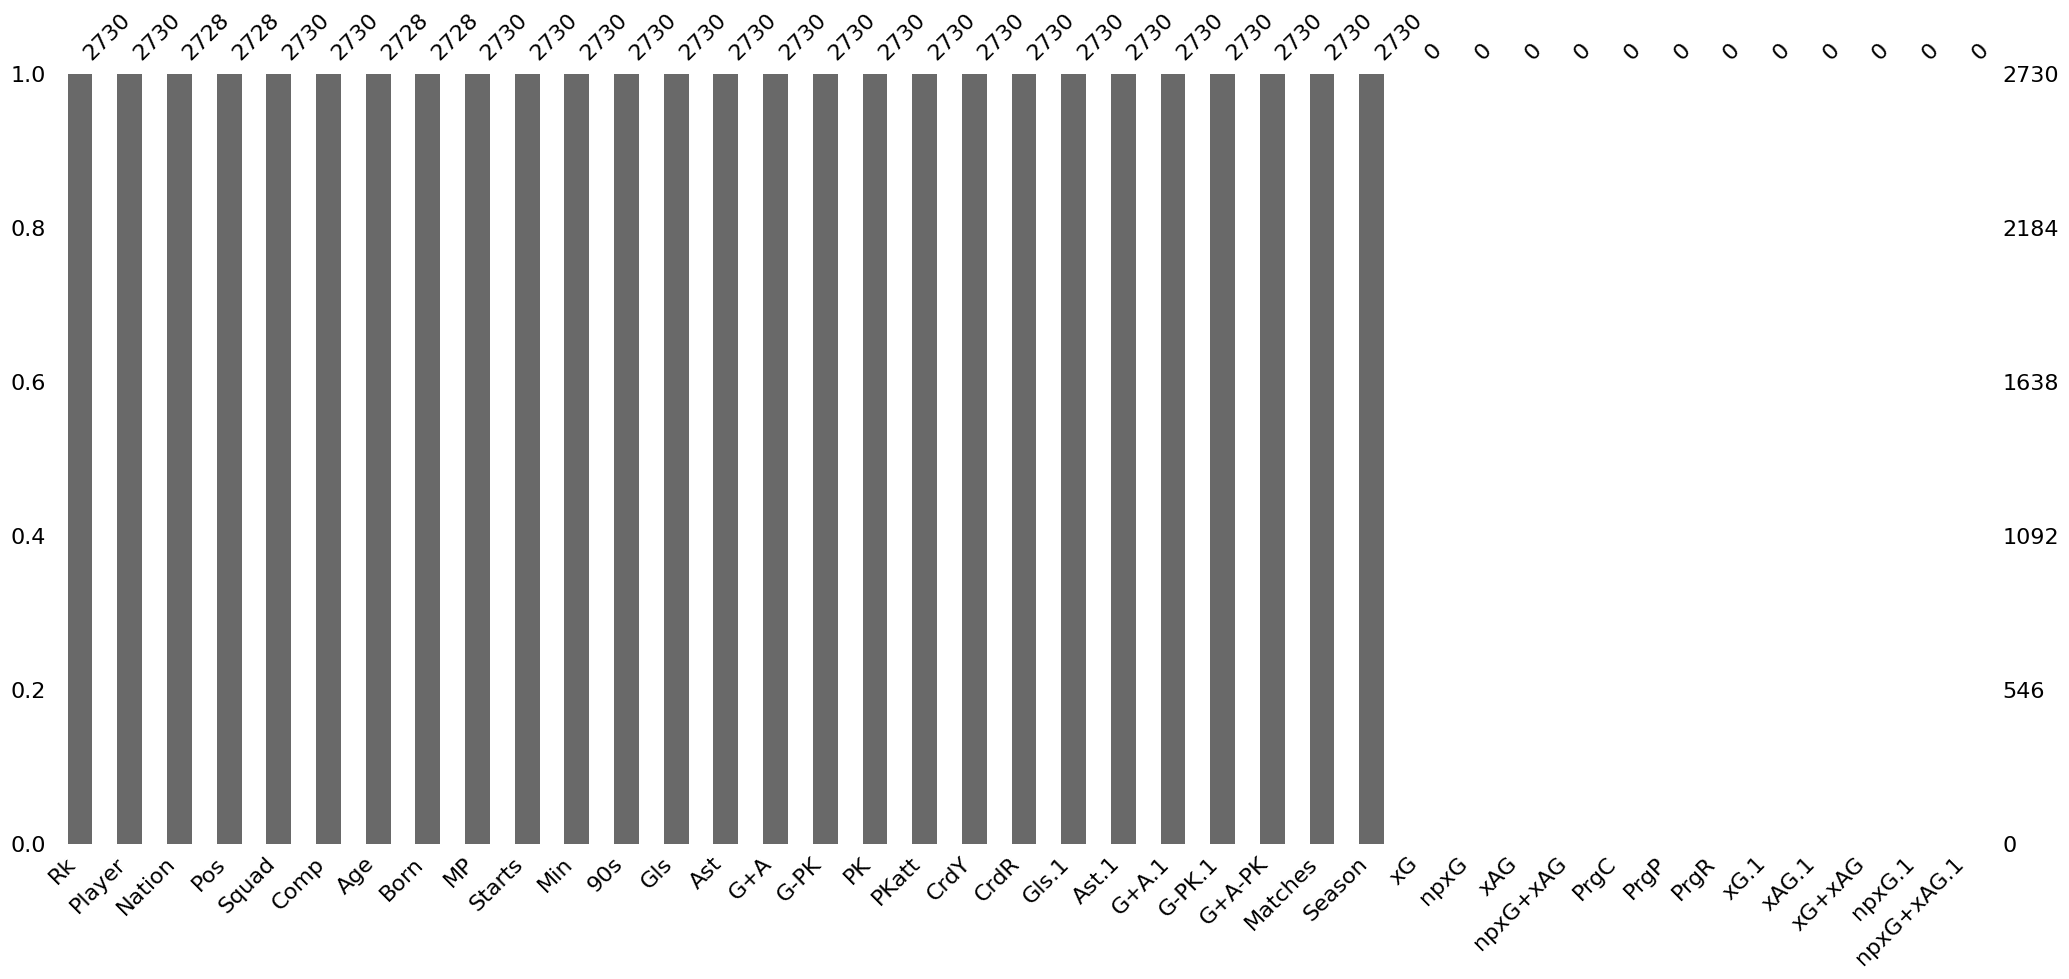

In [13]:
msno.bar(df)

In [14]:
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
count,2730.000000,2728.000000,2728.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1365.500000,25.368402,1990.279692,18.549451,14.715018,1321.743956,14.686117,1.847985,1.264835,3.112821,1.688645,0.159341,0.211722,2.765934,0.186081,0.114619,0.078945,0.193579,0.106029,0.184967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,788.227442,4.460590,4.466130,11.249394,11.328764,981.908486,10.909827,3.615848,2.003617,5.020852,3.237816,0.679406,0.814765,2.796731,0.580453,0.226450,0.179411,0.312531,0.216272,0.302138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,15.000000,1975.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,683.250000,22.000000,1987.000000,9.000000,4.000000,402.250000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1365.500000,25.000000,1990.000000,19.000000,13.000000,1205.000000,13.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2047.750000,29.000000,1994.000000,29.000000,25.000000,2136.000000,23.700000,2.000000,2.000000,4.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.150000,0.117500,0.287500,0.140000,0.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2730.000000,40.000000,2001.000000,38.000000,38.000000,3420.000000,38.000000,37.000000,18.000000,46.000000,31.000000,10.000000,12.000000,17.000000,8.000000,4.290000,6.000000,6.000000,4.290000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
int_columns = df.select_dtypes(include=['int64']).columns
variable_dropdown = widgets.Dropdown(
    options=int_columns,
    value=int_columns[0],
    description='Variable:'
)
sns.set_style("whitegrid")
def generate_boxplot(variable):
    fig, ax = plt.subplots(1, figsize=(20, 10))
    sns.boxplot(x=df[variable])
    plt.title('Boxplot of {}'.format(variable))
    plt.xlabel('{}'.format(variable))
    plt.show()

widgets.interact(generate_boxplot, variable=variable_dropdown)

interactive(children=(Dropdown(description='Variable:', options=('Rk', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G…

<function __main__.generate_boxplot(variable)>

In [17]:
path = 'C:/Users/AymenBouhou/Desktop/QuadraticFoot/Data/Whoscored/England-Premier-League-2016-2017.csv'

In [18]:
chunk_size = 1000
df = pd.DataFrame()
for chunk in pd.read_csv(path, chunksize=chunk_size):
    df = pd.concat([df, chunk])

pd.set_option('display.max_columns', None)

In [19]:
df.head()

,Unnamed: 0,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating,Goals,Yel,Red,SpG,AerialsWon,MoM,Dribble,Fouled,Off,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
0,0,Josh Harrop,32,Man Utd,27,AM(CL),1,90,0,1.0,41.0,97.6,1.0,0.0,0.0,8.34,1,0,0,2.0,0.0,1,1.0,1.0,0.0,1.0,3.0,6.0,0.0,4.0,0.0,1.0,2.0,0.0,0
1,1,Sergio Romero,32,Man Utd,36,GK,2,180,0,0.0,23.0,71.7,0.0,13.0,0.0,8.17,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,2,Demetri Mitchell,32,Man Utd,26,"D(L),M(LR)",1,90,0,2.0,50.0,86.0,1.0,1.0,1.0,8.15,0,0,0,0.0,0.0,0,2.0,2.0,0.0,1.0,3.0,5.0,3.0,0.0,0.0,2.0,1.0,0.0,0
3,3,Eden Hazard,15,Chelsea,32,"M(CLR),FW",36,3007,5,2.5,48.6,84.2,0.5,3.2,0.1,7.82,16,3,0,2.1,0.6,13,4.0,2.8,0.2,1.7,2.1,0.5,0.8,0.5,0.0,0.1,0.5,0.0,0
4,4,Alexis Sánchez,13,Arsenal,34,"M(CLR),FW",36(2),3224,10,2.1,43.2,73.6,0.4,2.0,0.2,7.75,24,6,0,3.4,0.4,11,2.9,1.8,0.7,3.4,2.5,1.4,0.6,1.3,0.0,0.1,0.8,0.0,0


In [20]:

# Count the number of non-unique values in 'col1'
non_unique_count = len(df) - df['player_name'].nunique()

# Print the result
print(f"There are {non_unique_count} non-unique values in 'Player'.")

There are 19 non-unique values in 'Player'.


<AxesSubplot: >

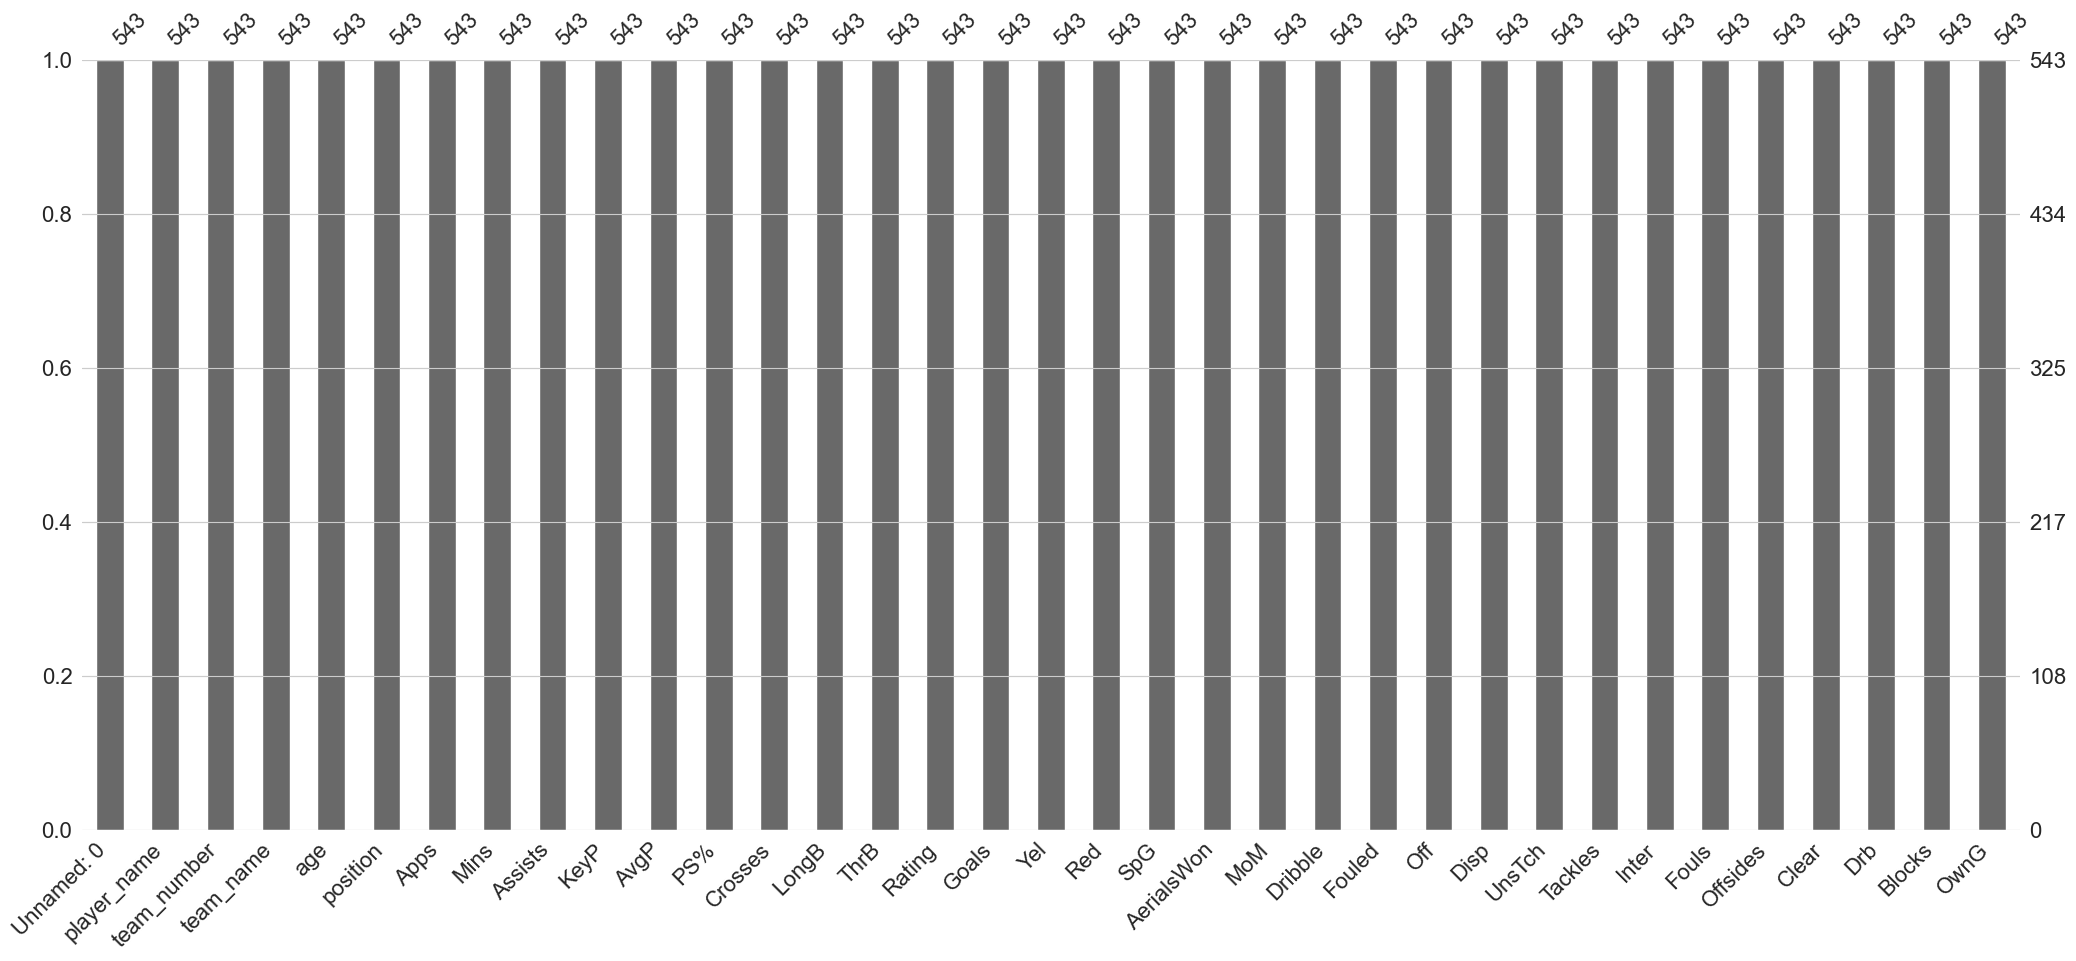

In [21]:
msno.bar(df)

In [22]:
df.describe()

,Unnamed: 0,team_number,age,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating,Goals,Yel,Red,SpG,AerialsWon,MoM,Dribble,Fouled,Off,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,271.000000,84.915285,32.755064,1384.390424,1.324125,0.562431,28.033886,76.177716,0.276980,1.995764,0.028913,6.678913,1.895028,2.563536,0.075506,0.780110,1.132597,0.699816,0.597238,0.696685,0.115654,0.698711,0.802578,1.138858,0.880110,0.755249,0.130203,1.739779,0.632228,0.226888,0.064457
std,156.894869,81.927473,4.242298,1046.401318,2.166056,0.557097,15.566268,13.263781,0.405457,2.279760,0.073098,0.392609,3.612457,2.736779,0.284612,0.758744,1.236718,1.432407,0.663444,0.539875,0.214669,0.667469,0.706058,0.897465,0.758574,0.547289,0.243531,2.048373,0.486584,0.301250,0.287321
min,0.000000,13.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.500000,21.000000,30.000000,413.000000,0.000000,0.150000,15.850000,71.400000,0.000000,0.400000,0.000000,6.400000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.100000,0.300000,0.000000,0.150000,0.200000,0.500000,0.200000,0.400000,0.000000,0.400000,0.300000,0.000000,0.000000
50%,271.000000,31.000000,33.000000,1292.000000,0.000000,0.400000,27.100000,79.200000,0.100000,1.300000,0.000000,6.650000,0.000000,2.000000,0.000000,0.600000,0.700000,0.000000,0.400000,0.600000,0.000000,0.500000,0.600000,1.000000,0.700000,0.700000,0.000000,0.900000,0.600000,0.100000,0.000000
75%,406.500000,167.000000,36.000000,2281.500000,2.000000,0.800000,37.400000,83.600000,0.400000,2.700000,0.000000,6.930000,2.000000,4.000000,0.000000,1.100000,1.600000,1.000000,0.800000,1.000000,0.100000,1.000000,1.100000,1.700000,1.400000,1.000000,0.150000,2.250000,0.900000,0.300000,0.000000
max,542.000000,259.000000,47.000000,3420.000000,18.000000,4.100000,85.700000,100.000000,2.800000,13.300000,1.000000,8.340000,29.000000,14.000000,2.000000,4.500000,9.200000,13.000000,5.000000,3.500000,1.500000,3.700000,3.500000,6.000000,3.500000,4.000000,1.200000,13.000000,2.200000,2.000000,2.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   543 non-null    int64  
 1   player_name  543 non-null    object 
 2   team_number  543 non-null    int64  
 3   team_name    543 non-null    object 
 4   age          543 non-null    int64  
 5   position     543 non-null    object 
 6   Apps         543 non-null    object 
 7   Mins         543 non-null    int64  
 8   Assists      543 non-null    int64  
 9   KeyP         543 non-null    float64
 10  AvgP         543 non-null    float64
 11  PS%          543 non-null    float64
 12  Crosses      543 non-null    float64
 13  LongB        543 non-null    float64
 14  ThrB         543 non-null    float64
 15  Rating       543 non-null    float64
 16  Goals        543 non-null    int64  
 17  Yel          543 non-null    int64  
 18  Red          543 non-null    int64  
 19  SpG     

In [25]:
int_columns = df.select_dtypes(include=['int64','float64']).columns
variable_dropdown = widgets.Dropdown(
    options=int_columns,
    value=int_columns[0],
    description='Variable:'
)
sns.set_style("whitegrid")
def generate_boxplot(variable):
    fig, ax = plt.subplots(1, figsize=(20, 10))
    sns.boxplot(x=df[variable])
    plt.title('Boxplot of {}'.format(variable))
    plt.xlabel('{}'.format(variable))
    plt.show()

widgets.interact(generate_boxplot, variable=variable_dropdown)

interactive(children=(Dropdown(description='Variable:', options=('Unnamed: 0', 'team_number', 'age', 'Mins', '…

<function __main__.generate_boxplot(variable)>